<a href="https://colab.research.google.com/github/koji0919/C100/blob/C100_add_explaination/pgm/public/C100_forWriteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


この.ipynbファイルは"**佐久間まゆがデータ解析する本**(C100,森の兄貴たち)"で扱ったRのソースコードを実際に体験してもらうものです。
本ソース本書でも解説したように、重回帰分析を使用し、説明変数のデータから目的変数(Target)の予測までを扱います。  


---
本書に従い、以下の流れでプログラムを用意しています。

1.   データの読み込み
2.   散布図によるデータの可視化
3.   最小二乗法の実施
4.   相関係数の計算
5.   データの精査
6.   重回帰分析の実施

各項目について解説と、ソースコードの記載された"セル"を用意しています。本書(佐久間まゆがデータ解析する本)と内容を照らし合わせながらお使いください

##データの読み込み(p.22～)
本書2.3.3ではデータの読み込みを行いました。
本書ではデータファイルのアップロードと読み込みを実施しましたが、
ここではgithubに作成したcsvファイルをurlを用いて参照します。  
以下のセルを実行することで、本プログラムで使用するデータを読み込みます。


---

 **セルの実行内容**

*   変数dfに読み込んだデータの格納
*   headを関数を利用してデータの確認






In [ ]:
df=read.csv("https://raw.githubusercontent.com/koji0919/C100/main/pgm/C100_Psan_dataset.csv")
head(df,n=5)  #データの先頭から5行分のデータにアクセス

,X,昼ごはんカロリー,歩数,前日夜ごはんカロリー,デスクワーク時間,X346株価,移動距離.km.,疲労度
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,928.2648,7360.969,1605.633,6.2414546,2020.078,47.04817,0.6895409
2,2,1076.0785,8030.141,1932.073,-4.8387119,1997.943,50.60654,1.1188544
3,3,1017.3056,2329.565,1780.962,-2.6177736,1993.756,22.10126,-1.7072597
4,4,948.9185,4029.149,1476.462,-0.5235055,1991.307,29.24467,-1.2055580
5,5,955.2149,4462.707,1369.655,3.5888930,1997.010,31.81329,-0.8175041


##変数間の関係確認(p.25～)
本書2.3.4章では散布図を使用し、個々の説明変数と目的変数の関係性を**可視化**しています。  
Rではplot関数を用いることで散布図を作成できます。

---
**セルの実行内容**

*    説明変数と目的変数で散布図を表示

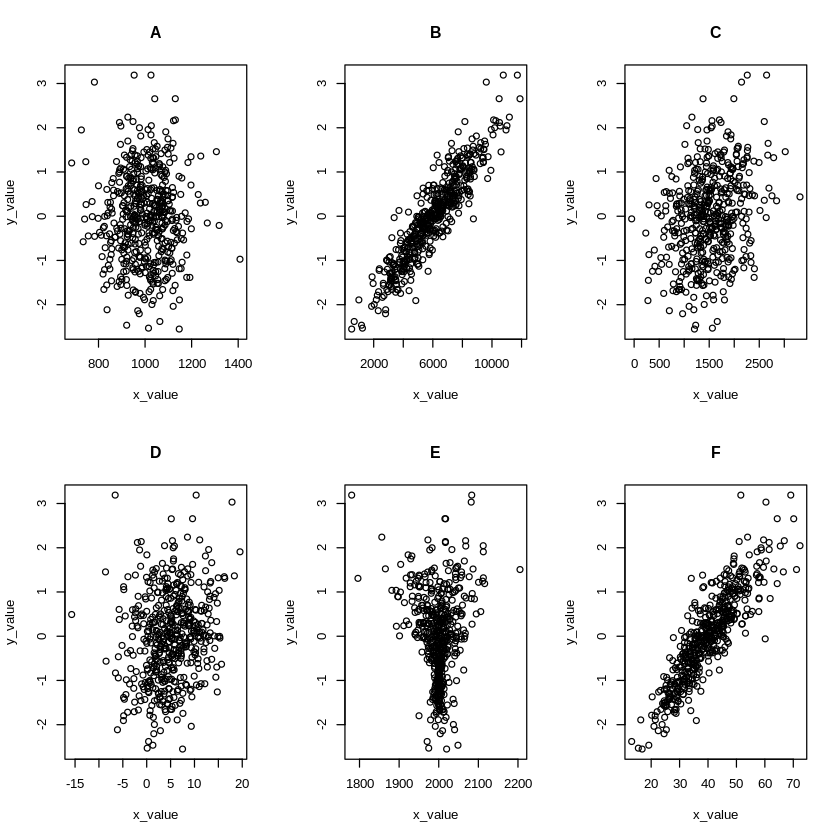

In [ ]:
colnames(df) <- c ("X","A","B","C","D","E","F","Target")  #データの列(特徴)名を変更
col_name=colnames(df)

x_col_min = 2 #1番目の列はデータ番号のため2番から参照
x_col_max = 7 #8番目の列は目的変数のため、7番目までの列のデータを参照する
par(mfrow=c(2,3)) #2x3で散布図を表示

for (i in  x_col_min:x_col_max){  #for文を使用し、各列のデータと目的変数との散布図を作成
  x_col_name = col_name[i]
  y_col_name = "Target"
  x_value = df[ ,x_col_name]
  y_value = df[ ,y_col_name]
  plot(x_value,y_value,main=col_name[i])  #散布図の作成
}

##最小二乗法で線を引く(p.35～)
前セルの実行結果から各散布図にプロットされたデータについて、それぞれの分布の様子が異なることが確認できます。本書の第３章では最小二乗法ではこのデータの集まりに対し、これを**最もよく表す直線**を引きます。   
ここで、この直線は目的変数をY、説明変数をXとして  
\\[Y=aX+b\\]
という数式で表されます。
aはXに対応する重み(直線の傾き)、bは切片を表しており、最小二乗法ではこのa,bを求めることができます。  
以下のセルでは、最小二乗法直線によって求めた直線を描画します。


---
**セルの実行内容**


*   最小二乗法の実施
*   求めた直線の描画


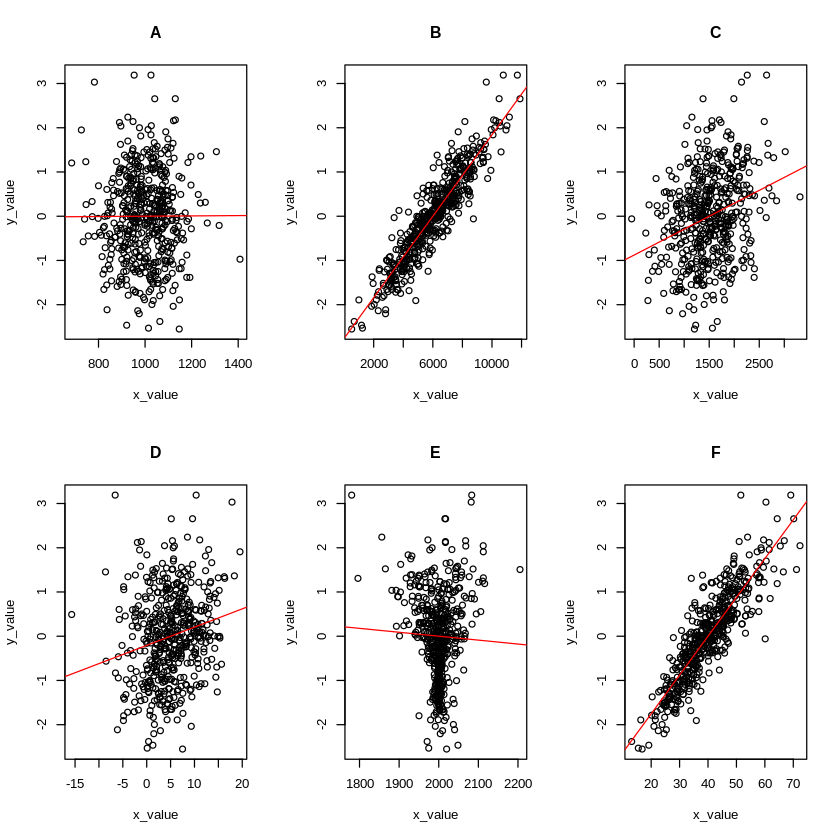

In [ ]:
drawRegressionline <- function(x,y){
    n = length(x) #n=xの数
    s_x = (sum((x-mean(x))**2))/n #xの分散算出
    s_xy = (sum((x-mean(x))*(y-mean(y))))/n #xyの共分散算出
    a = s_xy/s_x #傾き@<m>$\alpha$算出
    b = mean(y)-a*mean(x) #切片@<m>$\beta$算出
    abline(b,a,col="red") #赤の直線を引く
}

par(mfrow=c(2,3))
for (i in  x_col_min:x_col_max){
  x_col_name = col_name[i]
  y_col_name = "Target"
  x_value = df[ ,x_col_name]
  y_value = df[ ,y_col_name]
  plot(x_value,y_value,main=col_name[i])
  drawRegressionline(x_value,y_value)
}

##相関係数によるデータの厳選(p.47～)
最小二乗法の結果から目的変数に対応がないような説明変数があることがわかります。
本セルでは本書第4章の内容の通り、説明変数と目的変数の関係性を**相関係数**を用いて確かめます。  
Rではcor関数を使用することで2つの変数間の相関係数を求めることができます。


---
**セルの実行内容**

*   cor関数による説明変数と目的変数間の相関係数の計算



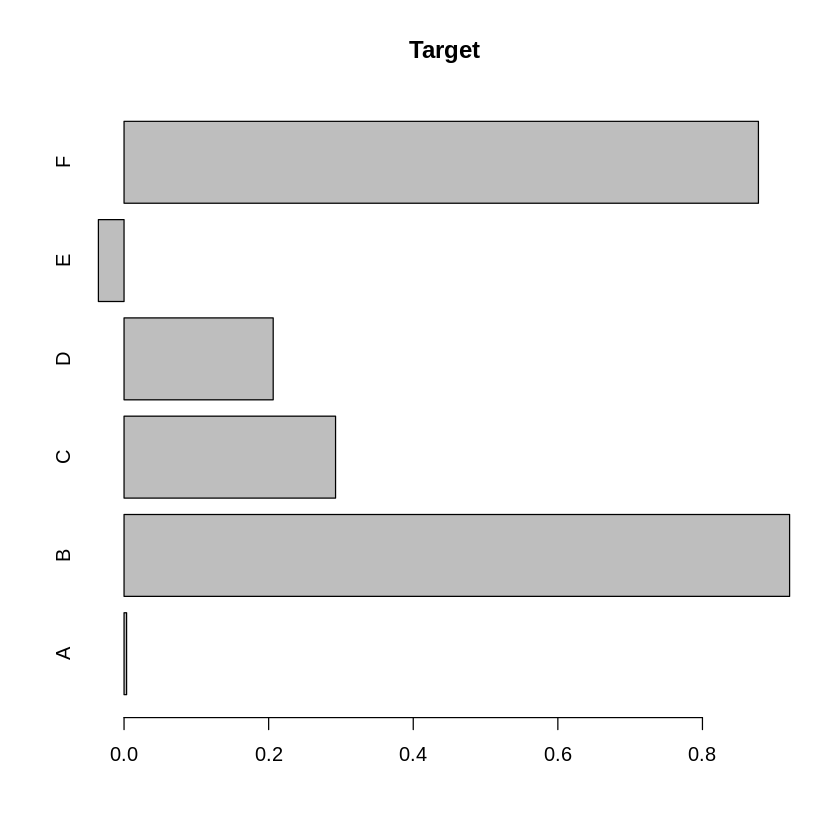

In [ ]:
cor_list <- c()
for (i in  x_col_min:x_col_max){
  x_col_name = col_name[i]
  y_col_name = "Target"
  x_value = df[ ,x_col_name]
  y_value = df[ ,y_col_name]
  cor_value = cor(x_value,y_value)
  cor_list = c(cor_list,cor_value)
}
barplot(  main = "Target", #タイトル
          cor_list, #表示する値
          horiz=T, #横方向のバーを表示
          names.arg=col_name[x_col_min:x_col_max]) #軸名を指定

##説明変数同士の相関係数を求める(p.54～)
4.2.4節では説明変数同士の相関係数も確認します。\
2重のforループを使用して前セルと同様の処理を繰り返し実施します。


---

**セルの実行内容**


*   説明変数間での相関係数の導出



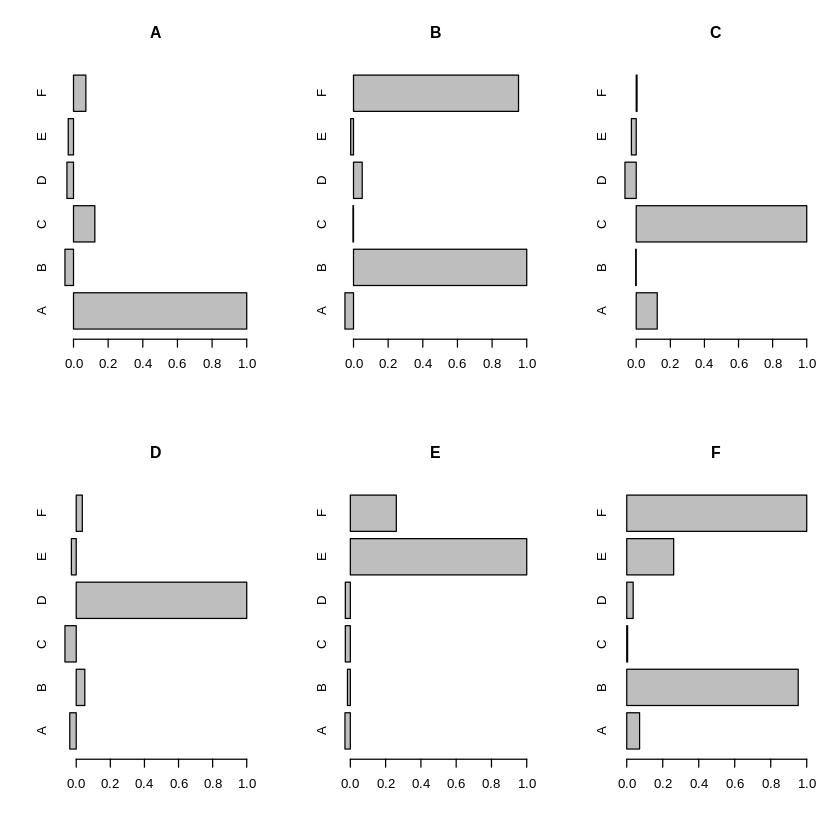

In [ ]:
par(mfrow=c(2,3)) 
for(h in x_col_min:x_col_max){ 
  cor_list <- c()
  for (i in  x_col_min:x_col_max){
    x_col_name = col_name[i]
    y_col_name = col_name[h] 
    x_value = df[ ,x_col_name]
    y_value = df[ ,y_col_name]
    cor_value = cor(x_value,y_value)
    cor_list = c(cor_list,cor_value)
  }
  barplot(  main = col_name[h],
            cor_list,
            horiz=T,
            names.arg=col_name[x_col_min:x_col_max])
}

##重回帰分析(p.59～)
相関係数の計算結果から目的変数の解析に際して、必要がないと思われる説明変数の目処が付きました。\
4.4節ではこれらの変数を使った場合と使わない場合での重回帰分析の結果を比較しています。
以下2つのセルではlm関数を使用し、各パターンでの重回帰分析を行います。

---
セルの実行内容


*   重回帰分析




In [ ]:
y_data= df[ ,"Target"]
x_data = df[,x_col_min:x_col_max]

formated_x_data<-data.frame(x_data) #解析用のデータにフォーマット

result=lm(formula=y_data~.,data=formated_x_data) #解析
summary(result) #解析結果表示


Call:
lm(formula = y_data ~ ., data = formated_x_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82175 -0.04963  0.00949  0.07299  0.74373 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.703e+00  4.194e-01  -8.830   <2e-16 ***
A            1.774e-04  8.194e-05   2.165   0.0308 *  
B            4.566e-04  4.068e-06 112.236   <2e-16 ***
C            6.100e-04  1.639e-05  37.213   <2e-16 ***
D            3.621e-02  1.630e-03  22.213   <2e-16 ***
E           -1.549e-04  2.032e-04  -0.763   0.4461    
F                   NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1813 on 494 degrees of freedom
Multiple R-squared:  0.9675,	Adjusted R-squared:  0.9671 
F-statistic:  2938 on 5 and 494 DF,  p-value: < 2.2e-16


In [ ]:
y_data= df[ ,"Target"]
x_col_min = x_col_min+1
x_col_max = x_col_max-2
x_data = df[,x_col_min:x_col_max]

formated_x_data<-data.frame(x_data) #解析用のデータにフォーマット

result=lm(formula=y_data~.,data=formated_x_data) #解析
summary(result) #解析結果表示


Call:
lm(formula = y_data ~ ., data = formated_x_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81396 -0.05462  0.01263  0.07523  0.73105 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.840e+00  3.656e-02 -105.03   <2e-16 ***
B            4.562e-04  4.077e-06  111.91   <2e-16 ***
C            6.147e-04  1.632e-05   37.66   <2e-16 ***
D            3.615e-02  1.634e-03   22.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1819 on 496 degrees of freedom
Multiple R-squared:  0.9671,	Adjusted R-squared:  0.9669 
F-statistic:  4862 on 3 and 496 DF,  p-value: < 2.2e-16


##あとがき
プログラムとデータ作成を担当した、こじです。  
着せ恋を何週も見ていたらいつの間にか春通り越してコミケ当日でびっくりしています。

本書で扱ったRは統計解析向けのプログラミング言語ということで統計に関する各種計算が実装済みの関数で行えちゃう優れものです。Pythonで同じことをしようとするとpandasなどのモジュールをimportして云々...と少し煩雑だったりします。ここはまさに本書の調理器具のたとえ話の通りですね。

　本書を手に取った方でこれからプログラミングやってみたい、と考えている方は、+αでその先のやりたいことを見据えて言語を選んでみると、そのやりたいことの達成までの道筋が短くなると思います。

　ただ、言語によっては環境を整えるのに手間のかかるものもあります。この点、インターネット環境があれば使用できるGoogle Colaboratoryは便利ですね。Pythonをメインに今回扱ったRやC言語にも対応しているみたいです。プログラミングしてみたいけどセットアップがよくわからない...という方は是非こうしたオンライン環境を活用してみてはいかがでしょうか。



